In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [0]:
xtrain, xtest = xtrain/ 255.0, xtest/255.0

In [0]:
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1, 784)

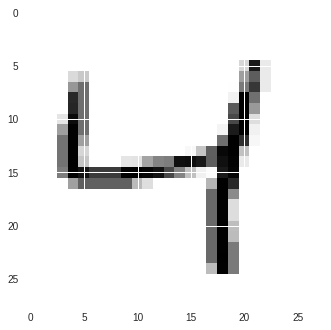

In [0]:
plt.imshow(xtrain[2].reshape(28, 28), cmap='Greys')

In [0]:
xtrain.shape

(60000, 784)

In [0]:
model = Sequential([Dense(32, activation='relu', input_shape=(xtrain.shape[1],)),
                   Dense(10, activation='softmax')])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [0]:
history = model.fit(xtrain, ytrain, epochs=30, validation_split=0.2, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 57us/step - loss: 0.3981 - acc: 0.8892 - val_loss: 0.2334 - val_acc: 0.9348
Epoch 2/30
48000/48000 [==============================] - 3s 54us/step - loss: 0.2194 - acc: 0.9363 - val_loss: 0.1932 - val_acc: 0.9443
Epoch 3/30
48000/48000 [==============================] - 3s 53us/step - loss: 0.1738 - acc: 0.9498 - val_loss: 0.1666 - val_acc: 0.9524
Epoch 4/30
48000/48000 [==============================] - 3s 54us/step - loss: 0.1433 - acc: 0.9582 - val_loss: 0.1487 - val_acc: 0.9597
Epoch 5/30
48000/48000 [==============================] - 3s 53us/step - loss: 0.1244 - acc: 0.9637 - val_loss: 0.1457 - val_acc: 0.9588
Epoch 6/30
48000/48000 [==============================] - 3s 53us/step - loss: 0.1097 - acc: 0.9680 - val_loss: 0.1448 - val_acc: 0.9579
Epoch 7/30
48000/48000 [==============================] - 3s 53us/step - loss: 0

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

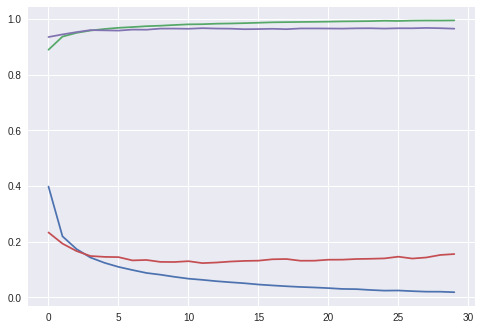

In [0]:
plt.plot(history.epoch, history.history['loss'], 
        history.epoch, history.history['acc'], 
        history.epoch, history.history['val_loss'],
        history.epoch, history.history['val_acc'])

In [0]:
model.evaluate(xtest, ytest)

10000/10000 [==============================] - 0s 25us/step


[0.13668268217125587, 0.966]